In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pyl
%matplotlib inline

In [3]:
df1 = pd.DataFrame.from_csv('./test3.txt', sep=' ', index_col=None)
# df1.head()

In [4]:
aggs = {'time_init':'mean', 'time_insert':'mean', 'time_remove':'mean'}
aggs = {'time_init':{'time_init_mean':'mean', 'time_init_std':'std'}, 'time_insert':{'time_insert_mean':'mean', 'time_insert_std':'std'}, 'time_remove':{'time_remove_mean':'mean', 'time_remove_std':'std'}}
s = df1.groupby(['container','size']).agg(aggs)
s.columns = s.columns.droplevel(0)
s = s.reset_index()
s.head()
s.loc[:,'time_total_mean'] = s.loc[:,'time_insert_mean'] +  s.loc[:,'time_remove_mean']
# .reset_index().pivot(index=['size'], columns=['container'], values=['time_insert'])

In [5]:
def plotColsLike( col_select, val,title, trend, trend_label):
    fig = plt.figure()
    ax = plt.subplot(111)
    d = s[s.container.map(col_select)].pivot(index='size', columns='container', values=val)
    d.loc[:,trend_label]=d.index.map(trend)
    d.plot(ax=ax)
    ax.set_title(title)
    ax.set_xlabel('log size')
    ax.set_ylabel('log time')
    ax.set_title(title)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.yscale('log')
    plt.xscale('log')
    pyl.savefig(title+'.png')
    return d
# s[s.container == 'std::list<Big<7>>'].pivot(index='size', columns='container', values='time_insert_mean')

# Build and Run
 * All the files were compiled with -O2 flag
 * The files were run on an amazon ec2 t2.2 micro instance
 * 1 Cpu, 1 GB Ram
 * For std::set, two plots have been added
   - First is marked ```std::set<int>(lin_search)``` and here the position of element to be added is linearly searched
   - This is relevant because the exact same template was used as other data structures
   - the other is marked simply ```std::set<int>``` and here the insert function is directly used that does a binary search in the bst representation of the set

# Plots
 * All the plots are plotted on log size vs log time plot
 * this allows us to see a good comparison for polynomial plots
 * a reference line ($10^{-6} \cdot x^2$) has been plotted to allow comparison
 
## Comparison of vector, list, set

 * Vector is the blue-green curve and list is blue
 * this shows that for most values, vector is the better option
 * this confirms the belief that working with contiguously allocated memory must be better
 * ```std::set<int>(lin_search)``` has a slight worse performance than list for insertion
 * ```std::set<int>``` has a much better performance than list, and it infact starts beating vector for >10^4 elements
 * remove time are much better for vector, mostlikely because of locality of operations on cache


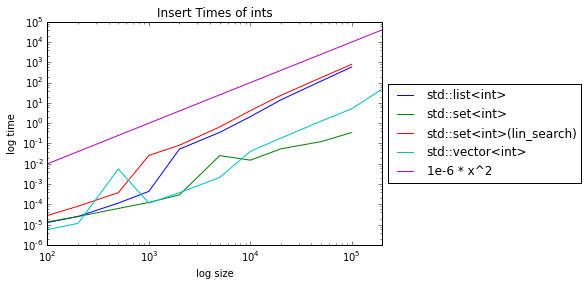

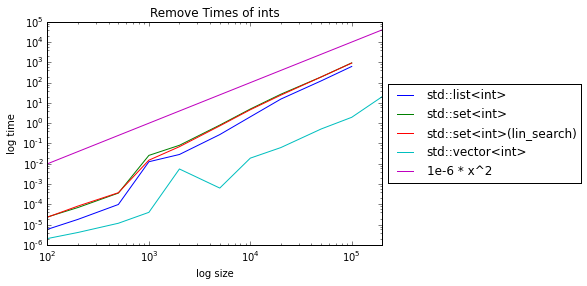

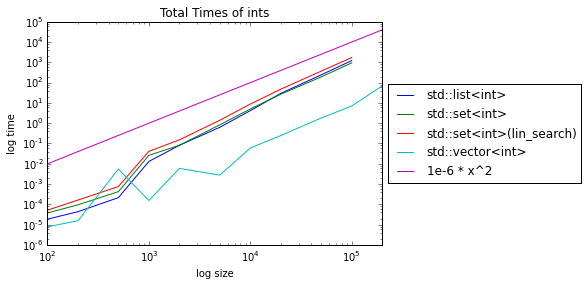

In [6]:
d1 = plotColsLike(lambda x: 'int' in x, 'time_insert_mean', 'Insert Times of ints',
                  lambda x: 1e-6*x**2, '1e-6 * x^2')
d2 = plotColsLike(lambda x: 'int' in x, 'time_remove_mean', 'Remove Times of ints',
                  lambda x: 1e-6*x**2, '1e-6 * x^2')
d2 = plotColsLike(lambda x: 'int' in x, 'time_total_mean', 'Total Times of ints',
                  lambda x: 1e-6*x**2, '1e-6 * x^2')

## Comparison of int vs big data structures for vectors and lists
* Big data structures, namely, 7 and 15 times the size of int were added to vectors for this experiment
* it can be noted that bigger data structures perform much worse than the int
* this is possibly because the locality of operations is decreased
* such a stark difference is not seen in lists

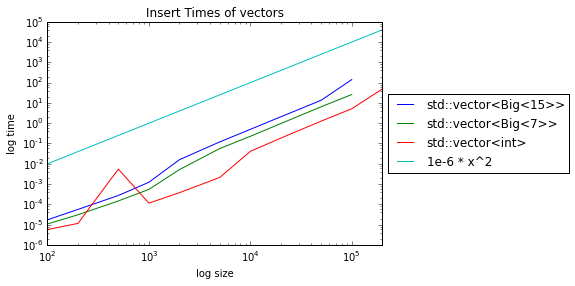

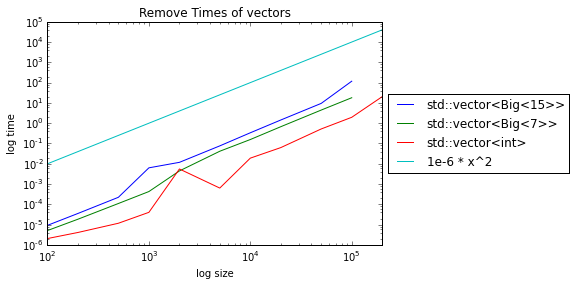

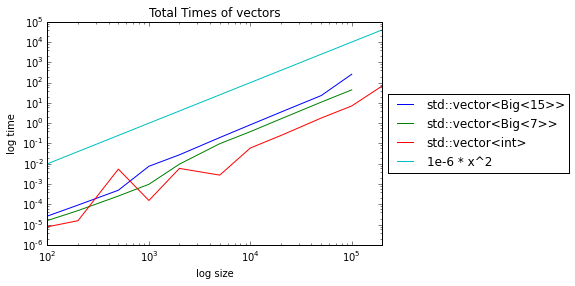

In [7]:
colselect =lambda x: ('vector' in x)
d1 = plotColsLike(colselect, 'time_insert_mean', 'Insert Times of vectors',
                  lambda x: 1e-6*x**2, '1e-6 * x^2')
d2 = plotColsLike(colselect, 'time_remove_mean', 'Remove Times of vectors',
                  lambda x: 1e-6*x**2, '1e-6 * x^2')
d2 = plotColsLike(colselect, 'time_total_mean', 'Total Times of vectors',
                  lambda x: 1e-6*x**2, '1e-6 * x^2')

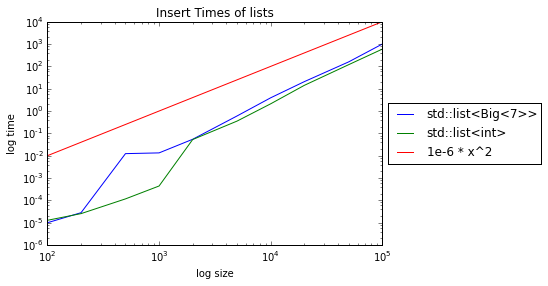

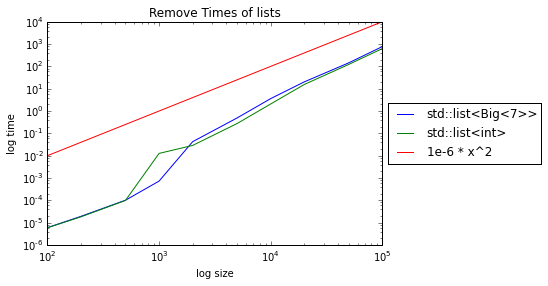

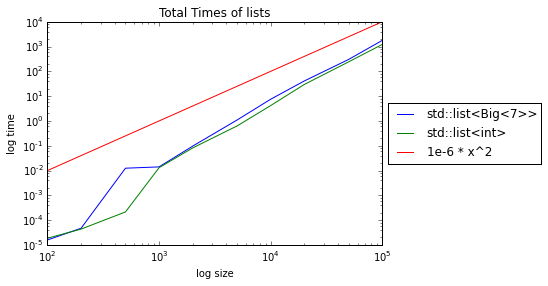

In [8]:
colselect =lambda x: ('list' in x)
d1 = plotColsLike(colselect, 'time_insert_mean', 'Insert Times of lists',
                  lambda x: 1e-6*x**2, '1e-6 * x^2')
d2 = plotColsLike(colselect, 'time_remove_mean', 'Remove Times of lists',
                  lambda x: 1e-6*x**2, '1e-6 * x^2')
d3 = plotColsLike(colselect, 'time_total_mean', 'Total Times of lists',
                  lambda x: 1e-6*x**2, '1e-6 * x^2')
